# Linear Regression Model Development
-------------------------------------

Linear Regression models are one of the most important models in Data Science. Here's what does linear regression mean according to the wikipedia:

> In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In this notebook, we would try to create a model to predict the car price. I would be using the analysis we discovered in the Exploratory Analysis notebook. So, if you're wondering why some variables and others not, look into that notebook to find out.

Then, it also follows that the dataset we would be using would be the car dataset for the UCI Machine Learning Repository.

Finally, this is based upon the IBM Course on Data Science.

First, we need to perform the necessary setup.

# Setup

Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline

Next, we would load the data and store in dataframe df.

In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Simple Linear Regression

Linear Regression has many sub-types. We would first start with the most basic one: simple linear regression. 

A simple Linear Regression is a method to help us understand the relationship between two variables:
* The predictor/independent variable (X)
* The target/response/dependent variable (that we want to predict)(y)

The result of a Linear Regression model is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

In mathematical terms, we can say:

If _y_ is response variable and _X_ is the predictor variable and _hat_ denotes the predicted value, then

<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{Y}&space;=&space;a&space;&plus;&space;bX" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\widehat{y}&space;=&space;a&space;&plus;&space;bX" title="\widehat{y} = a + bX" /></a>

where _a_ refers to the _intercept_ of the regression line or the value of _y_ when _X_ is 0 and 

_b_ refers to the _slope_ of the regression line or the value with which _y_ changes when _X_ increases by 1 unit

With python, we can easily make linear regression models with the help of libraries. To make the linear regression model, we first need to import the modules for it. We would be using the Sci-kit Learn library in python for that.

In [5]:
from sklearn.linear_model import LinearRegression

Now, we need to create the linear regression object

In [6]:
lm_s = LinearRegression()
lm_s

LinearRegression()

## Using the LinearRegression object to make the model

Now that we have the object, we should try and fit something in it. As our first go, let's try and predict how highway-mpg would serve as a predictor for the car price. 

To do that, we should first create our dependent and independent variables. 

In [7]:
X = df[['highway-mpg']]
y = df['price']

Now, let's fit the linear model. To do that we would be using the `fit()` method.

In [8]:
lm_s.fit(X,y)

LinearRegression()

To predict, we would be using the `predict()` method. For our model, we would do it like:

In [9]:
y_hat_s = lm_s.predict(X)
y_hat_s[0:5] # Print out the first 5 values   

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

## Getting the equation

Now according to the equation, we should also get intercepts and slope (or coefficients).
To get the interecept, we use the `intercept_` field

In [10]:
lm_s.intercept_

38423.305858157386

To get the coefficient, we use the `coeff_` field

In [11]:
lm_s.coef_

array([-821.73337832])

From above, we can see that a simple linear regression models has the structure:

<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{Y}&space;=&space;a&space;&plus;&space;bX" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\widehat{y}&space;=&space;a&space;&plus;&space;bX" title="\widehat{y} = a + bX" /></a>

Plugging in the actual values, we get:

__price__ = 38423.31 - 821.73 x  __highway-mpg__

# Multiple Linear Regression

There is a clear limiation in the simple linear regression model: we can't use multiple values. So, we need to use Multiple Linear Regression modeling for that.

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

Most of the real-world regression models involve multiple predictors. Here's how it looks like:

If, 
$
y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
\\...\\
X_n: Predictor\ Variable \ n\\
$


Then the equation is given by


<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{y}&space;=&space;a&space;&plus;&space;b_1X_1&space;&plus;&space;b_2X_2&space;&plus;&space;...&space;&plus;&space;b_nX_n" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\widehat{y}&space;=&space;a&space;&plus;&space;b_1X_1&space;&plus;&space;b_2X_2&space;&plus;&space;...&space;&plus;&space;b_nX_n" title="\widehat{y} = a + b_1X_1 + b_2X_2 + ... + b_nX_n" /></a>

where,

$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
\\...\\
b_n: coefficients \ of\ Variable \ n\\
$


From the previous section  we know that other good predictors of price could be:
* Horsepower
* Curb-weight
* Engine-size
* Highway-mpg

Let's develop a model using these variables as the predictor variables.

In [12]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [13]:
lm = LinearRegression()
lm.fit(Z, y)
y_hat = lm.predict(Z)

The intercept:

In [14]:
lm.intercept_

-15806.624626329198

Coefficients (b1, b2, b3, b4)?


In [15]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

## Final estimated linear model

Since our final linear function should have the structure:
<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{y}&space;=&space;a&space;&plus;&space;b_1X_1&space;&plus;&space;b_2X_2&space;&plus;&space;...&space;&plus;&space;b_nX_n" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\widehat{y}&space;=&space;a&space;&plus;&space;b_1X_1&space;&plus;&space;b_2X_2&space;&plus;&space;...&space;&plus;&space;b_nX_n" title="\widehat{y} = a + b_1X_1 + b_2X_2 + ... + b_nX_n" /></a>

We can get the following after plugging in the values:

__Price__ = -15678.742628061467 + 52.65851272 x __horsepower__ + 4.69878948 x __curb-weight__ + 81.95906216 x __engine-size__ + 33.58258185 x __highway-mpg__

# Model Evaluation with Visualization

Now that we've developed some models, we also need to evaluate them. One way to do this is by using visualization.

## Regression Plot

When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points, as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation). 

We also discussed this in the Exploratory Analysis Notebook

Let's visualize highway-mpg as potential predictor variable of price. 

We would be using the model we created before. Let's get y_hat.

In [16]:
y_hat_s = lm_s.predict(X)

To use our created model instead of the one fitted by seaborn, we would have to overlay our line with the points. Here's how to do it:

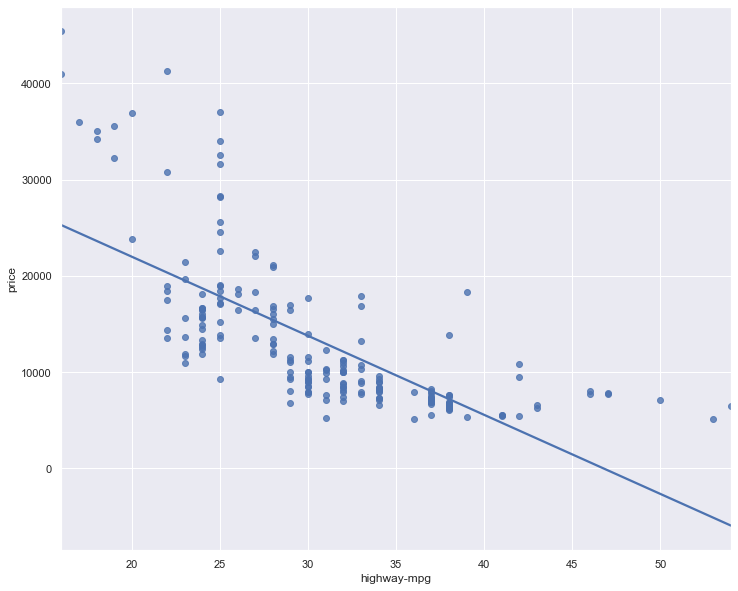

In [17]:
sns.set(rc={'figure.figsize':(12, 10)})
ax = sns.regplot(x=X, y=y, fit_reg=False,scatter_kws={"color": "b"}); # Don't fit the model, just the points for the read data
sns.regplot(x=X, y=y_hat_s, scatter=False, ax=ax, line_kws={"color": "b"}); # The fitted line. Just the model without scattering

The figure seems similar to the one we saw in the Exploratory Data Analysis notebook. And it's apparent that the model needs to be a polynomial fit. Before we delve into that, let's discuss one more crucial thing

## Residual Plot

A good way to see the appropriateness of the model is to use a residual plot. A residual plot plots residuals against the predictor variable. 

__Residual:__ The difference between the observed value (y) and the predicted value (y_hat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

A residual plot is great because we can glean insights about the model by looking at the spread of the residuals.

An appropriate linear model has a residual plot with residuals randomly spread out around the x-axis. Since that would mean the variance is constant for the residuals. A pattern in the residuals would mean that something needs to be checked.

To make a residual plot, we first need to calculate the residuals. To do that, we subtract the `y_hat_s` by `y`

In [18]:
res_y = y - y_hat_s

Now we simply plot it. 

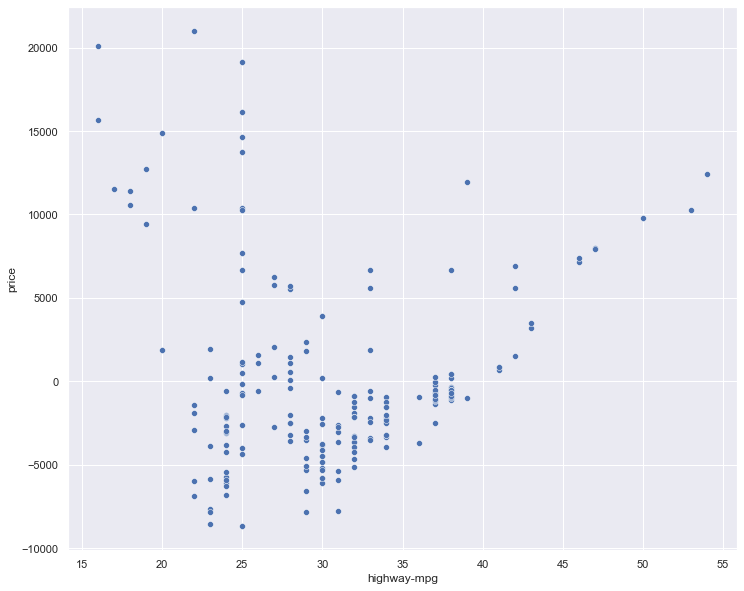

In [19]:
sns.scatterplot(x=X['highway-mpg'], y=res_y);

We can see from this residual plot that the residuals are not randomly spread around the x-axis. There is a clear curve, which means that we need a polynomial fit for the data. 

Lastly, we need a way to figure out a way to evaluate multiple linear regression model.

## Distribution plot for Multiple Linear Regression

Visualizing a model for Multiple Linear Regression gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

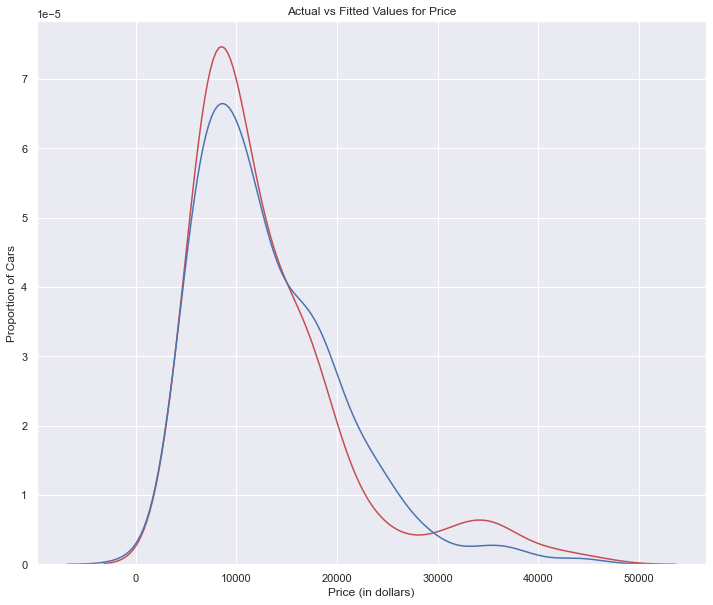

In [20]:
ax1 = sns.kdeplot(y, color="r", label="Actual Value")
sns.kdeplot(y_hat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

# Polynomial Regression

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. 

The only different thing is that features in it could have a power in them.

Examples of polynomial regression are:

__Quadratic - 2nd Order__

<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}" title="\widehat{y} = a + b_1X + b_2X^{2}" /></a>

__Cubic - 3rd Order__

<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}&space;&plus;&space;b_3X^{3}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}&space;&plus;&space;b_3X^{3}" title="\widehat{y} = a + b_1X + b_2X^{2} + b_3X^{3}" /></a>

__Higher Order__

<a href="https://www.codecogs.com/eqnedit.php?latex=\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}&space;&plus;&space;b_3X^{3}&space;&plus;&space;b_4X^{4}..." target="_blank"><img src="https://latex.codecogs.com/gif.latex?\widehat{y}&space;=&space;a&space;&plus;&space;b_1X&space;&plus;&space;b_2X^{2}&space;&plus;&space;b_3X^{3}&space;&plus;&space;b_4X^{4}..." title="\widehat{y} = a + b_1X + b_2X^{2} + b_3X^{3} + b_4X^{4}..." /></a>

To perform a polynomial regression, we first need to make a polynomial features object that will hold the different features (including the order you specified) for it. To do that, we would be using `PolynomialFeatures` in `Sci-kit Learn`

For demonstration purposes, we would be transforming only the highway-mpg first. Here's how to do it:

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2)

Now we will fit the data to it and then get the transformed _X_. We can do that in one step using the `fit_transform()` method.

In [22]:
X_2 = poly_2.fit_transform(X, y)

We have the transformed X. Let's create a linear model and fit the X_2 in it to get a polynomial regression model.

In [23]:
lm_p_s = LinearRegression()
lm_p_s.fit(X_2, y)
y_hat_2_s = lm_p_s.predict(X_2)

Now let's plot the data and see if we got it right.

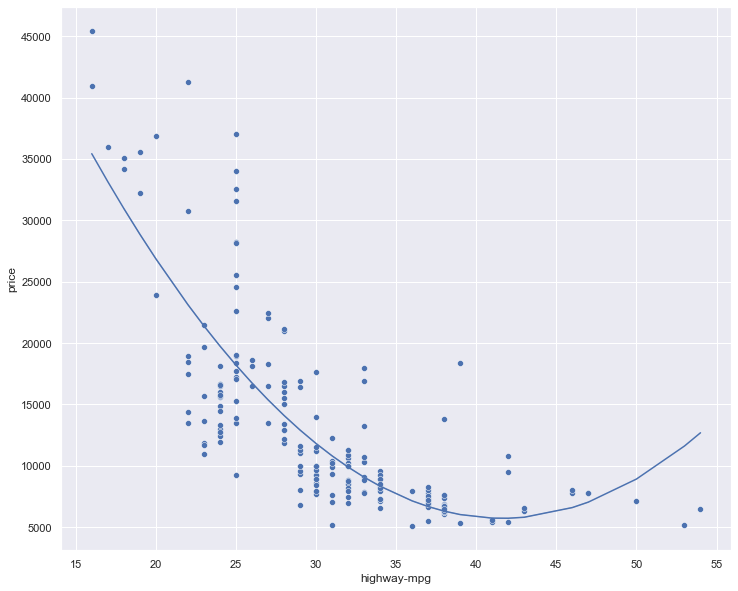

In [24]:
ax = sns.scatterplot(x=X['highway-mpg'], y=y); # Just the points for the read data
sns.lineplot(x=X['highway-mpg'], y=y_hat_2_s, ax=ax); # The fitted line. Just the model without scattering

Awesome. Looks like we did get the result we wanted.

# Pipelines

You may have noticed that we tend to perform similar operations with the `sklearn` objects. We also do them in sequence and place the subsequent result for the next operation. 

So, it would be nice to have a way to essentially 'automate' the process. That's where Pipeline comes into play. 

Pipelines are a great way to simplify the process. In a pipeline, we supply to it some transformers and an estimator at the end (it can be transformer too). And then we can use the methods such as `fit()`, `predict()`, `transform()` and so on directly on the pipeline. 

To demonstrate, we will create a pipeline that will first normalize the data, perform a 2nd order polynomial fit, and finally perform a linear regression. 

First, we import the necessary libraries and modules.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Then we create a list with tuples containing the name of the step and the transformer.

In [26]:
pipe_details = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]

The next step is to create a pipeline. For that, we pass the list to the `Pipeline()` function which returns back the object.

In [27]:
pipe = Pipeline(pipe_details)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

Now, we fit the data into the model. This will normalize it, create polynomial feature and model it automatically.

In [28]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

Similarly,  we can normalize the data, perform a transform and produce a prediction simultaneously

In [29]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Ridge Regression

Linear regression, while immensely useful and powerful, has its limitations. It can cause some features to be given a lot of weight and can also cause some problem in case of multi-colinearity. 

To combat those, we use Regularization techniques. One such technique is Ridge Regression, which is very similar to Lasso Regression.

Broadly speaking, we reduce the model complexity (or overfitting) of the data by regulating the coefficients in ridge regression. With the higher _alpha_ values, the model tends to have lower coefficients but too high can also cause underfitting. 

To perform a ridge regression, we would be using the `Ridge` module from `sklearn.linear_model`

To use the it, we would be creating a Ridge Regression object which would take an alpha parameter (with the default of 1). Then we would be using the same `fit` and `predict` methods for it.

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge(alpha=0.1)
ridge.fit(Z, y)
yhat_ridge = ridge.predict(Z)

In [33]:
yhat_ridge[0:4]

array([13699.11634983, 13699.11634983, 19051.65077844, 10620.36466281])

# Grid Search

From above, you would probably realize that changing alpha parameter would have a significant impact on the model. 

So, one often needs to test several parameter values to arrive at the best one. Grid Search is a way to do that. 

We would be using the `GridSearchCV` from `sklearn.model_selection` for it. This would allow us to perform an exhaustive search over the parameters required for the estimator optimized by cross-validated search. 

First let's import it.

In [40]:
from sklearn.model_selection import GridSearchCV

The next step is to create a dictonary or a list of dictionary that details the hyper-parameter that the function would examine.

In [42]:
hyper_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]}

Now we would in the values in the function. Concept of R-squared scoring (or 'r2') is explained below and cross-validation is in the 'Model Evaluation and Refinement' notebook.

In [43]:
grid = GridSearchCV(estimator=ridge, param_grid=hyper_params, scoring='r2', cv=4)

The next step is to fit the model into the grid.

In [44]:
grid.fit(Z, y)

GridSearchCV(cv=4, estimator=Ridge(alpha=0.1),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100,
                                   1000, 10000]},
             scoring='r2')

This would now find the best paramters for the model. We can get the best estimator by `best_estimator_`, the best paramter(s) by `best_params_`, and the best score by `best_score_`.

In [45]:
grid.best_score_

0.6724916803148246

In [46]:
grid.best_estimator_

Ridge(alpha=10000)

In [47]:
grid.best_params_

{'alpha': 10000}

# In-Sample Evaluation

Now that we have created a model, we need to evalualte it. Although we would be covering thorough evaluation in a different notebook, we can talk about some simple measures as of now. 

In this section, we would be covering quantitative measures to determine how accurate the model is. 

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

__R-squared__

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
    
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

__Root Mean Squared Error (RMSE)__

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ). It then square roots the result to get something that's more to the scale of the variables.

__Mean Absolute Error (MAE)__

The Mean Absolute Error takes the absolute value of the error and averages them. It gives a decent estimate since MSE is prone to overinflate large errors. However, do take note that it's not differentiable.

To calculate them, we first need to get the modules and functions. We would import the `r2_score`, `mean_absolute_error` and `mean_squared_error` from `sklearn.metrics`

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

The format to use them is pretty similar. You would use the desired function by passing in the true value in first parameter or `y_true` and predicted value in the second parameter or `y_pred.` Do note that the `mean_squared_error` doesn't returns RMSE by default. You need to pass on `False` to the `squared` parameter. Otherwise it will calculate Mean Squared Error instead. 

Let's try to evaluate our model by R-squared metric first.

In [35]:
r2_score(y_true=y, y_pred=ypipe)

0.8463341969864728

These means that the model explains about 84% of the variation.

Now, let's see RMSE and MAE

In [36]:
mean_squared_error(y_true=y, y_pred=ypipe, squared=False)

3107.509196123094

In [37]:
mean_absolute_error(y_true=y, y_pred=ypipe)

2156.4098380152595

To see if that's good or bad, we need to know more details about the price such as its means, std and so on. Let's use the describe method and figure them out. 

In [38]:
y.describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

Now we have a better idea of how to interpret the RMSE and MAE.

# Decision Making: Determining a Good Model

Now that we have the metrics, we need to know how to use them to choose models. 

The higher the R-squared value, the better the model is. Conversely, the lower the RMSE and MAE, the better the model is.

It's helpful to first set a minimum level for a model to be acceptable. This is usually based on the problem requirements. But this is perhaps one of the most important things to know beforehand. After that, you just have to see if the results are satisfactory.

The next step is to compare the different models you have. For different models, we can generally select on the basis of higher R-squared value and/or lower MAE or RMSE. 

As a final note: the more variables you have, the better your model is at predicting; but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the metrics.

# Author
By Abhinav Garg